# **Introducción LSTM**

In [ ]:
# Se cargan las librerías
from IPython.display import YouTubeVideo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

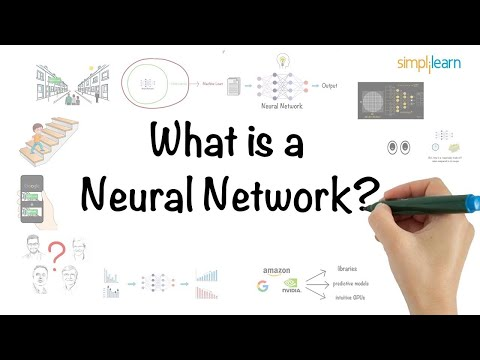

In [ ]:
# Breve introducción a las redes neuronales
YouTubeVideo('bfmFfD2RIcg')
# https://www.youtube.com/watch?v=bfmFfD2RIcg

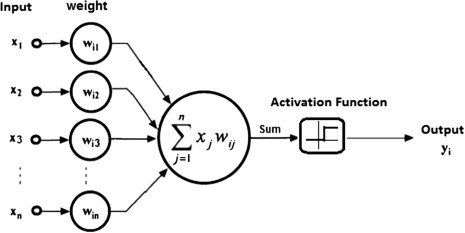

[Libro](https://github.com/ProWhalen/AndrewNg-ML/blob/master/Make%20Your%20Own%20Neural%20Network.pdf) que explica las redes neuronales de forma fácil.

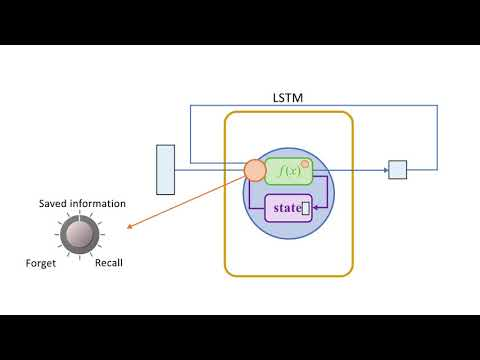

In [ ]:
# Breve introducción a las redes LSTM
YouTubeVideo('5dMXyiWddYs')
# https://www.youtube.com/watch?v=5dMXyiWddYs

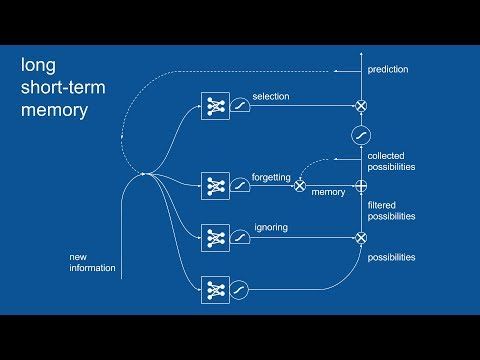

In [ ]:
# Explicación 1 sobre redes LSTM
YouTubeVideo('WCUNPb-5EYI')
# https://www.youtube.com/watch?v=WCUNPb-5EYI

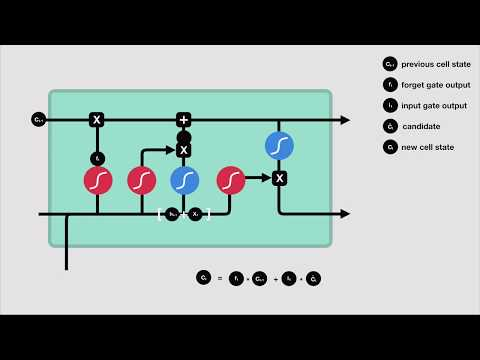

In [ ]:
# Explicación 2 sobre redes LSTM
YouTubeVideo('8HyCNIVRbSU')
# https://www.youtube.com/watch?v=8HyCNIVRbSU

En los siguientes links se encontrará mayor información sobre redes neuronales y redes LSTM: [link 1](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21) y [link 2](https://bookdown.org/amanas/traficomadrid/m%C3%A9todos-basados-en-deep-learning.html)

 [Fuente del ejercicio](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)

 [Explicación de las redes LSTM en Keras](https://www.kaggle.com/kmkarakaya/lstm-output-types-return-sequences-state)

# **Análisis Exploratorio**

In [ ]:
# Se carga la base Air Passengers (miles de pasajeros por mes)
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',usecols=[1], engine='python')
df.to_csv('Dataset')
df.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [ ]:
# Análisis exploratorio general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 1.2 KB


In [ ]:
# Análisis exploratorio por variable
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


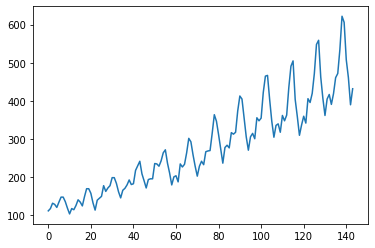

In [ ]:
# Graficamos la base
plt.plot(df)
plt.show()

# **LSTM**

In [ ]:
# Defino la semilla
np.random.seed(42)
# Transformo en un numpy array
df = df.values
df = df.astype('float32')
df

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

Las LSTMs son sensibles a la escala de los datos de entrada, especialmente cuando se utilizan las funciones de activación sigmoide (por defecto) o tanh. Por ello normalizamos los datos.

In [ ]:
# Normalizamos los datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

In [ ]:
# Dividimos en entrenamiento (70%) y testeo (30%)
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

100 44


Cargamos la siguiente función que toma dos argumentos: el conjunto de datos (dataset) y el look_back, que es el número de períodos anteriores para usar como variables de entrada para predecir el próximo período de tiempo.

Este valor predeterminado creará un conjunto de datos donde X es el número de pasajeros en un momento dado (t) e Y es el número de pasajeros en el próximo momento (t + 1).

In [ ]:
# Defino la función create_dataset
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# Ejemplo de lo que hace la función
look_back = 2
dfX, dfY = create_dataset(df, look_back)
np.column_stack((dfX,dfY))

array([[112., 118., 132.],
       [118., 132., 129.],
       [132., 129., 121.],
       [129., 121., 135.],
       [121., 135., 148.],
       [135., 148., 148.],
       [148., 148., 136.],
       [148., 136., 119.],
       [136., 119., 104.],
       [119., 104., 118.],
       [104., 118., 115.],
       [118., 115., 126.],
       [115., 126., 141.],
       [126., 141., 135.],
       [141., 135., 125.],
       [135., 125., 149.],
       [125., 149., 170.],
       [149., 170., 170.],
       [170., 170., 158.],
       [170., 158., 133.],
       [158., 133., 114.],
       [133., 114., 140.],
       [114., 140., 145.],
       [140., 145., 150.],
       [145., 150., 178.],
       [150., 178., 163.],
       [178., 163., 172.],
       [163., 172., 178.],
       [172., 178., 199.],
       [178., 199., 199.],
       [199., 199., 184.],
       [199., 184., 162.],
       [184., 162., 146.],
       [162., 146., 166.],
       [146., 166., 171.],
       [166., 171., 180.],
       [171., 180., 193.],
 

In [ ]:
# Aplico la función para los datos de entrenamiento y testeo normalizados
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
np.column_stack((trainX,trainY))
print(np.shape(trainX))
print(trainX)

(99, 1)
[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123553]
 [0.04247104]
 [0.07142857]
 [0.05984557]
 [0.04054055]
 [0.08687258]
 [0.12741312]
 [0.12741312]
 [0.10424709]
 [0.05598456]
 [0.01930502]
 [0.06949806]
 [0.07915059]
 [0.08880308]
 [0.14285713]
 [0.11389962]
 [0.13127413]
 [0.14285713]
 [0.18339768]
 [0.18339768]
 [0.15444016]
 [0.11196911]
 [0.08108109]
 [0.1196911 ]
 [0.12934363]
 [0.14671814]
 [0.17181468]
 [0.14864865]
 [0.15250966]
 [0.22007722]
 [0.24324325]
 [0.26640925]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374519]
 [0.17760617]
 [0.17760617]
 [0.25482625]
 [0.25289574]
 [0.24131274]
 [0.26833975]
 [0.3088803 ]
 [0.32432434]
 [0.25675675]
 [0.20656371]
 [0.14671814]
 [0.18725869]
 [0.19305018]
 [0.16216215]
 [0.25289574]
 [0.23745173]
 [0.25096524]
 [0.3088803 ]
 [0.38223937]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.1911197 

La red LSTM espera que los datos de entrada se proporcionen con una estructura de matriz específica en forma de: **[muestras, períodos de tiempo, variables]**. Por ejemplo, hacemos el seguimiento de la temperatura (una variable) y la presión (otra variable) cada segundo (períodos de tiempo) durante una semana (604,800 segundos). Podemos elegir secuencias de 60 segundos, que se traducen en 10.080 muestras de 60 períodos de tiempo y 2 variables o la forma de entrada del LSTM: [10080, 60, 2] (604,800 segundos se pueden dividir en 10,080 bloques de 60 segundos). 

Otro ejemplo es que si se tienen datos para 20 períodos de tiempo para 2 variables, se puede representar como 20 muestras con 1 período de tiempo [20, 1, 2] o como 1 muestra con 20 períodos de tiempo [1, 20, 2]. En el primer caso, se tendrán 20 muestras, es decir, 20 ejemplos de entrada y salida y su modelo hará 20 predicciones. En el último caso, se tiene 1 muestra, con 1 entrada y 1 salida, y el modelo hará 1 predicción.

Nuestros datos preparados están en la forma: [muestras, variables] y estamos enmarcando el problema como un período de tiempo por cada fila. Podemos transformar los datos en la estructura esperada utilizando numpy.reshape() de la siguiente manera:

In [ ]:
# Rediseño la entrada para que sea [muestras, períodos de tiempo, variables]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(np.shape(trainX))
print(np.shape(testX))

(99, 1, 1)
(43, 1, 1)


Para ver más en detalle como deber ser el input de la red LSTM ver estos links: [link1](https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/) [link2](https://machinelearningmastery.com/prepare-univariate-time-series-data-long-short-term-memory-networks/) [link3](https://machinelearningmastery.com/faq/single-faq/what-is-the-difference-between-samples-timesteps-and-features-for-lstm-input/)

Creamos y entrenamos la red neuronal. Se inicializa el modelo con el comando Sequential. La red tiene una primer capa con 1 entrada, una capa oculta con 4 bloques LSTM o neuronas y una capa de salida que hace una sola predicción. La función de activación sigmoide se utiliza para los bloques de memoria LSTM. La red está entrenada para 100 corridas y se utiliza un tamaño de lote de 1 (batch size). [Parámetros del LSTM en Keras](https://keras.io/api/layers/recurrent_layers/lstm/) y [Parámetros del model.fit](https://keras.io/api/models/model_training_apis/)

In [ ]:
# Creamos y entrenamos la red LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) # input_shape = (períodos de tiempo, variables)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
99/99 - 2s - loss: 0.0545
Epoch 2/100
99/99 - 0s - loss: 0.0264
Epoch 3/100
99/99 - 0s - loss: 0.0197
Epoch 4/100
99/99 - 0s - loss: 0.0177
Epoch 5/100
99/99 - 0s - loss: 0.0165
Epoch 6/100
99/99 - 0s - loss: 0.0155
Epoch 7/100
99/99 - 0s - loss: 0.0144
Epoch 8/100
99/99 - 0s - loss: 0.0135
Epoch 9/100
99/99 - 0s - loss: 0.0124
Epoch 10/100
99/99 - 0s - loss: 0.0114
Epoch 11/100
99/99 - 0s - loss: 0.0103
Epoch 12/100
99/99 - 0s - loss: 0.0092
Epoch 13/100
99/99 - 0s - loss: 0.0083
Epoch 14/100
99/99 - 0s - loss: 0.0075
Epoch 15/100
99/99 - 0s - loss: 0.0066
Epoch 16/100
99/99 - 0s - loss: 0.0057
Epoch 17/100
99/99 - 0s - loss: 0.0051
Epoch 18/100
99/99 - 0s - loss: 0.0045
Epoch 19/100
99/99 - 0s - loss: 0.0039
Epoch 20/100
99/99 - 0s - loss: 0.0035
Epoch 21/100
99/99 - 0s - loss: 0.0030
Epoch 22/100
99/99 - 0s - loss: 0.0029
Epoch 23/100
99/99 - 0s - loss: 0.0026
Epoch 24/100
99/99 - 0s - loss: 0.0024
Epoch 25/100
99/99 - 0s - loss: 0.0023
Epoch 26/100
99/99 - 0s - loss: 0.

In [ ]:
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Realizo las predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Realizo la transformación inversa para llevar las predcciones a los valores originales
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Calculo el RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.48 RMSE
Test Score: 48.26 RMSE


Debido a cómo se preparó el conjunto de datos, debemos reformar las predicciones para que se ajusten al conjunto de datos original. Se grafican los datos originales en azul y las predicciones en el conjunto de testeo en naranja.

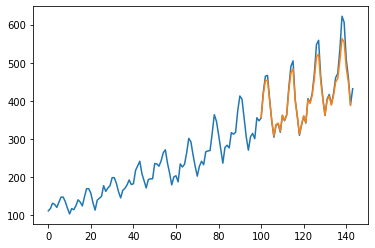

In [ ]:
# Cálculo de las predicciones de test para el ploteo
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) - 1:len(dataset) - 1, :] = testPredict
# Ploteo de la serie original y las predicciones
plt.plot(scaler.inverse_transform(dataset))
plt.plot(testPredictPlot)
plt.show()

# LSTM aumentando la ventana de lags con nuevas variables

Aplicamos el mismo modelo pero esta vez tomando una ventana temporal de 3 lags, configurando el look_back = 3

In [ ]:
# Aplico la función para los datos de entrenamiento y testeo normalizados
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX

array([[0.01544401, 0.02702703, 0.05405405],
       [0.02702703, 0.05405405, 0.04826255],
       [0.05405405, 0.04826255, 0.03281853],
       [0.04826255, 0.03281853, 0.05984557],
       [0.03281853, 0.05984557, 0.08494207],
       [0.05984557, 0.08494207, 0.08494207],
       [0.08494207, 0.08494207, 0.06177607],
       [0.08494207, 0.06177607, 0.02895753],
       [0.06177607, 0.02895753, 0.        ],
       [0.02895753, 0.        , 0.02702703],
       [0.        , 0.02702703, 0.02123553],
       [0.02702703, 0.02123553, 0.04247104],
       [0.02123553, 0.04247104, 0.07142857],
       [0.04247104, 0.07142857, 0.05984557],
       [0.07142857, 0.05984557, 0.04054055],
       [0.05984557, 0.04054055, 0.08687258],
       [0.04054055, 0.08687258, 0.12741312],
       [0.08687258, 0.12741312, 0.12741312],
       [0.12741312, 0.12741312, 0.10424709],
       [0.12741312, 0.10424709, 0.05598456],
       [0.10424709, 0.05598456, 0.01930502],
       [0.05598456, 0.01930502, 0.06949806],
       [0.

En este caso consdiero los 3 lags como si fuesen tres variables distintas. Usamos el tiempo actual (t) así como los dos tiempos anteriores (t-1 y t-2) como variables de entrada. De esta forma las variables de entrada son t-2, t-1, t y la variable de salida es t+1

(97, 1, 3)
(41, 1, 3)
Epoch 1/100
97/97 - 2s - loss: 0.0329
Epoch 2/100
97/97 - 0s - loss: 0.0119
Epoch 3/100
97/97 - 0s - loss: 0.0091
Epoch 4/100
97/97 - 0s - loss: 0.0079
Epoch 5/100
97/97 - 0s - loss: 0.0068
Epoch 6/100
97/97 - 0s - loss: 0.0060
Epoch 7/100
97/97 - 0s - loss: 0.0053
Epoch 8/100
97/97 - 0s - loss: 0.0050
Epoch 9/100
97/97 - 0s - loss: 0.0046
Epoch 10/100
97/97 - 0s - loss: 0.0043
Epoch 11/100
97/97 - 0s - loss: 0.0042
Epoch 12/100
97/97 - 0s - loss: 0.0042
Epoch 13/100
97/97 - 0s - loss: 0.0040
Epoch 14/100
97/97 - 0s - loss: 0.0039
Epoch 15/100
97/97 - 0s - loss: 0.0039
Epoch 16/100
97/97 - 0s - loss: 0.0038
Epoch 17/100
97/97 - 0s - loss: 0.0037
Epoch 18/100
97/97 - 0s - loss: 0.0036
Epoch 19/100
97/97 - 0s - loss: 0.0038
Epoch 20/100
97/97 - 0s - loss: 0.0036
Epoch 21/100
97/97 - 0s - loss: 0.0037
Epoch 22/100
97/97 - 0s - loss: 0.0034
Epoch 23/100
97/97 - 0s - loss: 0.0037
Epoch 24/100
97/97 - 0s - loss: 0.0034
Epoch 25/100
97/97 - 0s - loss: 0.0034
Epoch 26/100

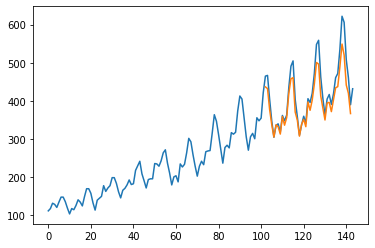

In [ ]:
# Rediseño la entrada para que sea [muestras, períodos de tiempo, variables]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(np.shape(trainX))
print(np.shape(testX))
# Creamos y entrenamos la red LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
print(model.summary())
# Realizo las predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Realizo la transformación inversa para llevar las predcciones a los valores originales
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Calculo el RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# Cálculo de las predicciones de test para el ploteo
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) - 1:len(dataset) - 1, :] = testPredict
# Ploteo de la serie original y las predicciones
plt.plot(scaler.inverse_transform(dataset))
plt.plot(testPredictPlot)
plt.show()

# LSTM aumentando la ventana de lags con períodos de tiempo

En este caso en lugar de formular las observaciones pasadas como variables de entrada separadas, podemos usarlas como períodos de tiempo de la misma variable de entrada, que de hecho es un marco más preciso del problema.

(97, 3, 1)
(41, 3, 1)
Epoch 1/100
97/97 - 2s - loss: 0.0243
Epoch 2/100
97/97 - 0s - loss: 0.0097
Epoch 3/100
97/97 - 0s - loss: 0.0084
Epoch 4/100
97/97 - 0s - loss: 0.0069
Epoch 5/100
97/97 - 0s - loss: 0.0058
Epoch 6/100
97/97 - 0s - loss: 0.0049
Epoch 7/100
97/97 - 0s - loss: 0.0044
Epoch 8/100
97/97 - 0s - loss: 0.0041
Epoch 9/100
97/97 - 0s - loss: 0.0039
Epoch 10/100
97/97 - 0s - loss: 0.0038
Epoch 11/100
97/97 - 0s - loss: 0.0037
Epoch 12/100
97/97 - 0s - loss: 0.0037
Epoch 13/100
97/97 - 0s - loss: 0.0038
Epoch 14/100
97/97 - 0s - loss: 0.0036
Epoch 15/100
97/97 - 0s - loss: 0.0036
Epoch 16/100
97/97 - 0s - loss: 0.0037
Epoch 17/100
97/97 - 0s - loss: 0.0037
Epoch 18/100
97/97 - 0s - loss: 0.0037
Epoch 19/100
97/97 - 0s - loss: 0.0036
Epoch 20/100
97/97 - 0s - loss: 0.0037
Epoch 21/100
97/97 - 0s - loss: 0.0036
Epoch 22/100
97/97 - 0s - loss: 0.0035
Epoch 23/100
97/97 - 0s - loss: 0.0036
Epoch 24/100
97/97 - 0s - loss: 0.0035
Epoch 25/100
97/97 - 0s - loss: 0.0035
Epoch 26/100

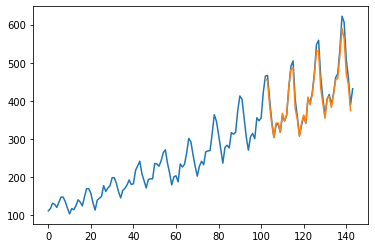

In [ ]:
# Se cargan las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#  Defino la función create_dataset
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# Defino la semilla
np.random.seed(42)
# Se carga la base Air Passengers (miles de pasajeros por mes)
dataframe = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# Normalizamos los datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# Dividimos en entrenamiento (70%) y testeo (30%)
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# Aplico la función para los datos de entrenamiento y testeo normalizados
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Rediseño la entrada para que sea [muestras, períodos de tiempo, variables]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print(np.shape(trainX))
print(np.shape(testX))
# Creamos y entrenamos la red LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
print(model.summary())
# Realizo las predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Realizo la transformación inversa para llevar las predcciones a los valores originales
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Calculo el RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# Cálculo de las predicciones de test para el ploteo
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) - 1:len(dataset) - 1, :] = testPredict
# Ploteo de la serie original y las predicciones
plt.plot(scaler.inverse_transform(dataset))
plt.plot(testPredictPlot)
plt.show()

# LSTM con memoria entre lotes (batch)

La red LSTM tiene una memoria que le permite recordar a través de largas secuencias. Normalmente, el estado (parámetro llamado "stateful") dentro de la red se resetea automáticamente después de cada batch (lote) de entrenamiento. En caso de que sea "true" significa que construimos estados a lo largo de toda la secuencia de entrenamiento e incluso mantenerlos si es necesario para hacer predicciones. Comparación entre LSTM stateful y stateless: [link](https://machinelearningmastery.com/stateful-stateless-lstm-time-series-forecasting-python/). Para mayor información sobre stateful LSTM ver los siguientes links: [link 1](http://philipperemy.github.io/keras-stateful-lstm/), [link 2](https://machinelearningmastery.com/understanding-stateful-lstm-recurrent-neural-networks-python-keras/) y [link 3](https://fairyonice.github.io/Stateful-LSTM-model-training-in-Keras.html#:~:text=Stateful%20flag%20is%20Keras,can't%20backpropagate%20between%20batches.)

Además necesitamos que los datos de entrenamiento no se mezclen cuando se está entrenando la red (shuffle=False). Por default, las muestras dentro de una corrida se randomizan antes de exponerse a la red. Nuevamente, esto no es deseable para el LSTM porque queremos que se mantenga el estado a medida que aprende a través de la secuencia de observaciones. También requiere el restablecimiento explícito del estado de la red después de cada entrenamiento (epoch o corrida) mediante la sentencia model.reset_states(). Esto significa que debemos crear nuestro propio loops de corridas y dentro de cada corrida llamar a model.fit() y model.reset states()

In [ ]:
for i in range(100):
  model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
  model.reset_states()

Finalmente, cuando se construye la capa LSTM con stetful = "True" en lugar de especificar las dimensiones de entrada, debemos especificar el número de muestras por batch, el número de períodos de tiempo en una muestra y el número de variables en un período de tiempo configurando el parámetro "batch_input_shape". Por ejemplo:

In [ ]:
model.add(LSTM(4, batch_input_shape=(batch_size, time_steps, features), stateful=True))

Este mismo tamaño de batch debe usarse al evaluar el modelo y hacer predicciones, por ejemplo:

In [ ]:
model.predict(trainX, batch_size=batch_size)

Podemos adaptar el ejemplo anterior para usar una LSTM con estado.

(97, 3, 1)
(41, 3, 1)
97/97 - 17s - loss: 0.0046
97/97 - 0s - loss: 0.0061
97/97 - 0s - loss: 0.0054
97/97 - 0s - loss: 0.0050
97/97 - 0s - loss: 0.0048
97/97 - 0s - loss: 0.0047
97/97 - 0s - loss: 0.0046
97/97 - 0s - loss: 0.0046
97/97 - 0s - loss: 0.0045
97/97 - 0s - loss: 0.0045
97/97 - 0s - loss: 0.0045
97/97 - 0s - loss: 0.0044
97/97 - 0s - loss: 0.0044
97/97 - 0s - loss: 0.0044
97/97 - 0s - loss: 0.0043
97/97 - 0s - loss: 0.0043
97/97 - 0s - loss: 0.0043
97/97 - 0s - loss: 0.0042
97/97 - 0s - loss: 0.0042
97/97 - 0s - loss: 0.0042
97/97 - 0s - loss: 0.0041
97/97 - 0s - loss: 0.0041
97/97 - 0s - loss: 0.0041
97/97 - 0s - loss: 0.0040
97/97 - 0s - loss: 0.0040
97/97 - 0s - loss: 0.0040
97/97 - 0s - loss: 0.0039
97/97 - 0s - loss: 0.0039
97/97 - 0s - loss: 0.0038
97/97 - 0s - loss: 0.0038
97/97 - 0s - loss: 0.0038
97/97 - 0s - loss: 0.0037
97/97 - 0s - loss: 0.0037
97/97 - 0s - loss: 0.0037
97/97 - 0s - loss: 0.0036
97/97 - 0s - loss: 0.0036
97/97 - 0s - loss: 0.0035
97/97 - 0s - lo

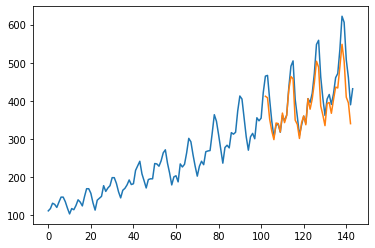

In [ ]:
# Se cargan las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# Defino la función create_dataset
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# Defino la semilla
np.random.seed(42)
# Se carga la base Air Passengers (miles de pasajeros por mes)
dataframe = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# Normalizamos los datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# Dividimos en entrenamiento (70%) y testeo (30%)
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# Aplico la función para los datos de entrenamiento y testeo normalizados
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Rediseño la entrada para que sea [muestras, períodos de tiempo, variables]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print(np.shape(trainX))
print(np.shape(testX))
# Creamos y entrenamos la red LSTM
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
print(model.summary())
# Realizo las predicciones
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# Realizo la transformación inversa para llevar las predcciones a los valores originales
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Calculo el RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# Cálculo de las predicciones de test para el ploteo
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) - 1:len(dataset) - 1, :] = testPredict
# Ploteo de la serie original y las predicciones
plt.plot(scaler.inverse_transform(dataset))
plt.plot(testPredictPlot)
plt.show()

# Stacked LSTM con memoria entre lotes (batch)

Finalmente, veremos uno de los grandes beneficios de las LSTM, el cual es el hecho de que puedan ser entrenadas exitosamente cuando se apilan en arquitecturas de red profundas (deep network). El modelo LSTM original se compone de una sola capa LSTM oculta seguida de una capa de salida. Stacked LSTM es una extensión de este modelo que tiene múltiples capas LSTM ocultas donde cada capa contiene múltiples celdas de memoria.

La configuración que se requiere es que una capa LSTM, antes de cada capa LSTM posterior, deba devolver la secuencia. Esto se puede hacer estableciendo el parámetro de secuencias de retorno o return_sequences = True. Más detalles sobre esta configuración [(link)](https://machinelearningmastery.com/stacked-long-short-term-memory-networks/) y explicación detallada sobre las LSTM y el return_sequences [(link)](https://medium.com/analytics-vidhya/lstms-explained-a-complete-technically-accurate-conceptual-guide-with-keras-2a650327e8f2). Podemos hacer eso de la siguiente forma:

In [ ]:
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True,
return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))

El código completo es el siguiente:

(97, 3, 1)
(41, 3, 1)
97/97 - 3s - loss: 0.0052
97/97 - 0s - loss: 0.0128
97/97 - 0s - loss: 0.0092
97/97 - 0s - loss: 0.0075
97/97 - 0s - loss: 0.0066
97/97 - 0s - loss: 0.0060
97/97 - 0s - loss: 0.0057
97/97 - 0s - loss: 0.0054
97/97 - 0s - loss: 0.0052
97/97 - 0s - loss: 0.0049
97/97 - 0s - loss: 0.0047
97/97 - 0s - loss: 0.0046
97/97 - 0s - loss: 0.0044
97/97 - 0s - loss: 0.0043
97/97 - 0s - loss: 0.0043
97/97 - 0s - loss: 0.0042
97/97 - 0s - loss: 0.0041
97/97 - 0s - loss: 0.0040
97/97 - 0s - loss: 0.0039
97/97 - 0s - loss: 0.0037
97/97 - 0s - loss: 0.0036
97/97 - 0s - loss: 0.0034
97/97 - 0s - loss: 0.0033
97/97 - 0s - loss: 0.0031
97/97 - 0s - loss: 0.0030
97/97 - 0s - loss: 0.0028
97/97 - 0s - loss: 0.0027
97/97 - 0s - loss: 0.0025
97/97 - 0s - loss: 0.0024
97/97 - 0s - loss: 0.0023
97/97 - 0s - loss: 0.0023
97/97 - 0s - loss: 0.0022
97/97 - 0s - loss: 0.0021
97/97 - 0s - loss: 0.0021
97/97 - 0s - loss: 0.0021
97/97 - 0s - loss: 0.0020
97/97 - 0s - loss: 0.0020
97/97 - 0s - los

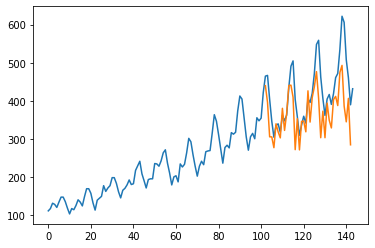

In [ ]:
# Se cargan las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# Defino la función create_dataset
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# Defino la semilla
np.random.seed(42)
# Se carga la base Air Passengers (miles de pasajeros por mes)
dataframe = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# Normalizamos los datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# Dividimos en entrenamiento (70%) y testeo (30%)
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# Aplico la función para los datos de entrenamiento y testeo normalizados
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Rediseño la entrada para que sea [muestras, períodos de tiempo, variables]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print(np.shape(trainX))
print(np.shape(testX))
# Creamos y entrenamos la red LSTM
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
print(model.summary())
# Realizo las predicciones
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# Realizo la transformación inversa para llevar las predcciones a los valores originales
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Calculo el RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# Cálculo de las predicciones de test para el ploteo
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) - 1:len(dataset) - 1, :] = testPredict
# Ploteo de la serie original y las predicciones
plt.plot(scaler.inverse_transform(dataset))
plt.plot(testPredictPlot)
plt.show()